In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Births2015.csv',usecols=['date','births'],index_col=[0])

In [3]:
data.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [4]:
data.isnull().sum()

births    0
dtype: int64

In [5]:
data.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


In [6]:
data.shape

(365, 1)

## Lets plot the distribution

<AxesSubplot:xlabel='date'>

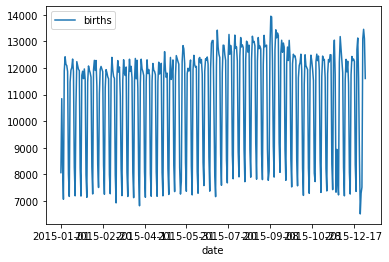

In [7]:
data.plot()

## Lets Check the noise of the data

In [8]:
## Lets find the moving average
data_mean=data.rolling(window=10).mean()

<AxesSubplot:xlabel='date'>

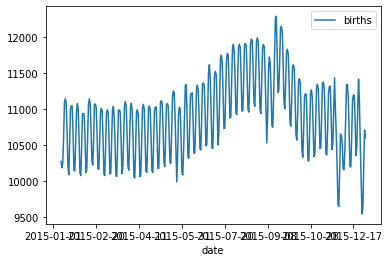

In [9]:
data_mean.plot()

we can see the there is peak in data

## Lets apply Arima for forecast the birth

In [10]:
!pip install statsmodels

In [11]:
## Importing the required libraries
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

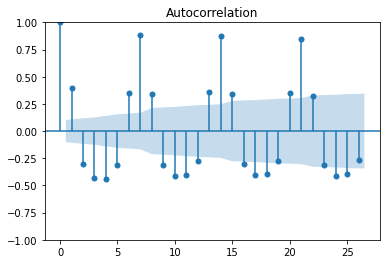

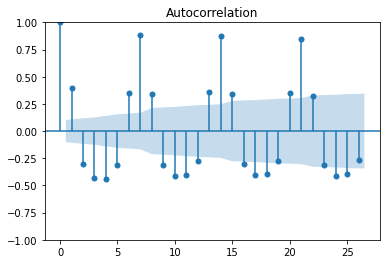

In [12]:
## Plotting acf and pacf for parameters of Arima
plot_acf(data)

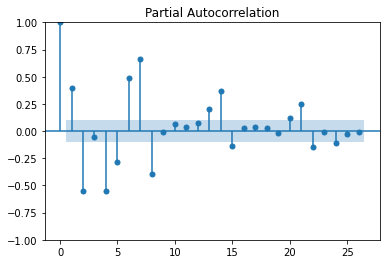

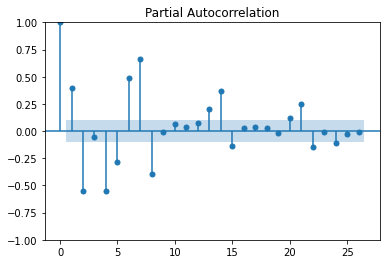

In [13]:
plot_pacf(data)

In [14]:
data.size

365

In [15]:
train_data=data[0:300]
test_data=data[300:]

In [16]:
train_data.size

300

In [17]:
test_data.size

65

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
birth_model=SARIMAX(train_data,order=(7,1,7),seasonal_order=(0, 0, 0, 0))

c:\users\laxman singh\desktop\extra material\new folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\laxman singh\desktop\extra material\new folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [20]:
result=birth_model.fit()

c:\users\laxman singh\desktop\extra material\new folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
result.aic

4769.922546931457

In [22]:
result_forecast=result.forecast(steps = 65)

In [23]:
test_data['births']

date
2015-10-28    12266
2015-10-29    11950
2015-10-30    11529
2015-10-31     8049
2015-11-01     7731
              ...  
2015-12-27     7518
2015-12-28    13100
2015-12-29    13458
2015-12-30    13100
2015-12-31    11608
Name: births, Length: 65, dtype: int64

In [24]:
result_forecast

2015-10-28    12122.980920
2015-10-29    12355.924939
2015-10-30    12237.611262
2015-10-31     8578.778963
2015-11-01     7696.314838
                  ...     
2015-12-27     7988.744315
2015-12-28    11303.485486
2015-12-29    12227.986405
2015-12-30    11612.016785
2015-12-31    12343.622635
Freq: D, Name: predicted_mean, Length: 65, dtype: float64

In [25]:
df=pd.DataFrame(test_data['births'].values,result_forecast)
df.columns=['Original']
df

,Original
predicted_mean,
12122.980920,12266
12355.924939,11950
12237.611262,11529
8578.778963,8049
7696.314838,7731
...,...
7988.744315,7518
11303.485486,13100
12227.986405,13458
